# Unsupervised Learning — Lecture

Comprehensive lecture with theory, practical code, and detailed explanations after every code cell.

**Contents**:
- Introduction and definitions
- Types and examples
- K-Means practical implementation (with explanations)
- Exercises and next steps

---

## 1. What is Unsupervised Learning?

**Unsupervised Learning** trains models on data **without labels**. The algorithm discovers patterns, structures, or groupings in the data without being given a target output. Examples include clustering, dimensionality reduction, anomaly detection, and association.

**Key points:**
- Works with only input features `X` (no `y`).
- Goal: find hidden structure (clusters, components).
- Output: descriptive models rather than predictive models.

## 2. Supervised vs Unsupervised Learning

| Feature | Supervised | Unsupervised |
|---|---:|---:|
| Labels | Required (X and y) | Not required (only X) |
| Goal | Predict outputs | Discover structure |
| Examples | Regression, Classification | Clustering, PCA |



## 3. Real-World Examples

- **Customer Segmentation** (retail): cluster customers by behavior.
- **Document Clustering**: group articles by topics.
- **Image compression / feature extraction**: reduce dimensions while preserving information.
- **Anomaly detection**: fraud detection, unusual activity identification.

## 4. Types of Unsupervised Learning

1. **Clustering** (K-Means, Hierarchical, DBSCAN)
2. **Dimensionality Reduction** (PCA, t-SNE, Autoencoders)
3. **Association** (Apriori)
4. **Anomaly Detection** (Isolation Forest, One-Class SVM)



## 5. Basic Workflow

1. Collect unlabeled data
2. Preprocess (cleaning, scaling)
3. Choose algorithm
4. Train
5. Visualize and interpret

---

In [8]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Ensure plots show inline in notebooks (if executing interactively)
%matplotlib inline

print('Libraries imported successfully')

Libraries imported successfully


**Explanation:**

- `numpy`, `pandas` for numerical and tabular data handling.
- `matplotlib` for visualization.
- `KMeans` is the clustering algorithm from scikit-learn.
- `make_blobs` generates synthetic clusterable data for demonstrations.
- `%matplotlib inline` makes plots display inside the notebook when executed.

In [9]:
# Step 2: Generate synthetic data with make_blobs
# n_samples: total number of points
# centers: number of clusters to generate
# cluster_std: standard deviation (spread) of each cluster
# random_state: reproducible randomness

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df.head()

,Feature_1,Feature_2
0,-9.113944,6.813616
1,-9.354576,7.092790
2,-2.015671,8.281780
3,-7.010236,-6.220843
4,-10.061202,6.718671


**Explanation of parameters:**

- `n_samples=300`: creates 300 data points in total.
- `centers=4`: asks `make_blobs` to generate data around **4 distinct centers** (i.e., 4 clusters). Each center acts like a centroid for a group of points.
  - If you change `centers` to 3 or 5, you will get 3 or 5 groups respectively.
- `cluster_std=0.60`: controls the **spread** of points around each center (the standard deviation).
  - Smaller values (e.g., 0.2) → tight, compact clusters.
  - Larger values (e.g., 1.5) → clusters are more spread and may overlap.

**Analogy:** `centers=4` is like telling the generator to place 4 groups of people in a field. `cluster_std` controls how tightly each group stands together.

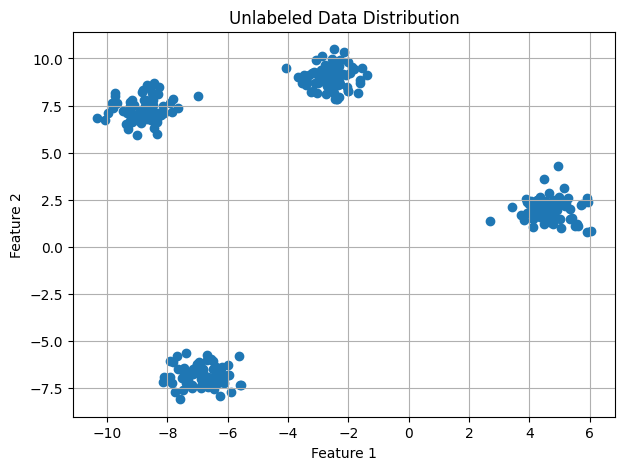

In [10]:
# Step 3: Visualize the raw, unlabeled data
plt.figure(figsize=(7,5))
plt.scatter(df['Feature_1'], df['Feature_2'])
plt.title("Unlabeled Data Distribution")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

**Explanation:**

- This plot shows the data before clustering.
- Even without labels, you can visually inspect the potential groups.
- Visualization helps to form intuition about the number of clusters and cluster separability.

In [11]:
# Step 4: Initialize and fit K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df)

print("K-Means fitted. Inertia (sum of squared distances to centroids):", kmeans.inertia_)

K-Means fitted. Inertia (sum of squared distances to centroids): 203.8907468405834


**Explanation:**

- `KMeans(n_clusters=4)` sets the algorithm to find 4 clusters.
- `.fit(df)` runs the K-Means algorithm which:
  1. Initializes centroids (randomly or via k-means++).
  2. Assigns each point to the nearest centroid.
  3. Recomputes centroids as the mean of assigned points.
  4. Repeats until convergence.

- `inertia_` is the within-cluster sum-of-squares (a measure of compactness). Lower is generally better for a given `k`.

In [12]:
# Step 5: Attach cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_
df.head()

,Feature_1,Feature_2,Cluster
0,-9.113944,6.813616,3
1,-9.354576,7.092790,3
2,-2.015671,8.281780,0
3,-7.010236,-6.220843,1
4,-10.061202,6.718671,3


**Explanation:**

- `kmeans.labels_` contains the assigned cluster index for each data point (0 to k-1).
- Adding the labels to the DataFrame allows further analysis per cluster (counts, statistics, etc.).

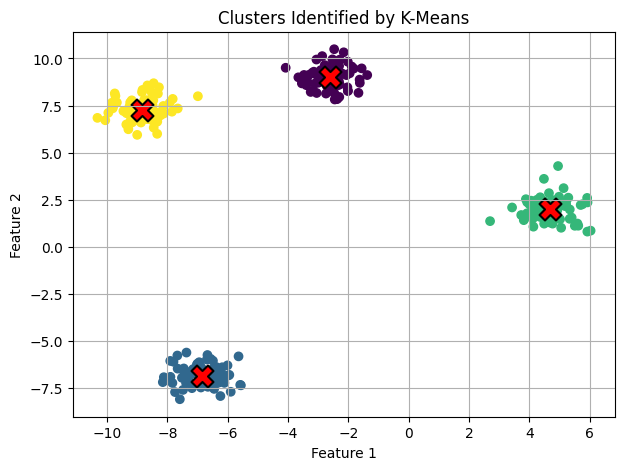

In [13]:
# Step 6: Plot clusters with centroids
plt.figure(figsize=(7,5))
plt.scatter(df['Feature_1'], df['Feature_2'], c=df['Cluster'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=250, c='red', marker='X', edgecolor='k', linewidth=1.5)
plt.title("Clusters Identified by K-Means")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

**Explanation:**

- Points are color-coded by the cluster assigned by K-Means.
- Red 'X' markers are the learned centroids (`kmeans.cluster_centers_`).
- This visualization helps validate whether clustering aligns with human intuition.

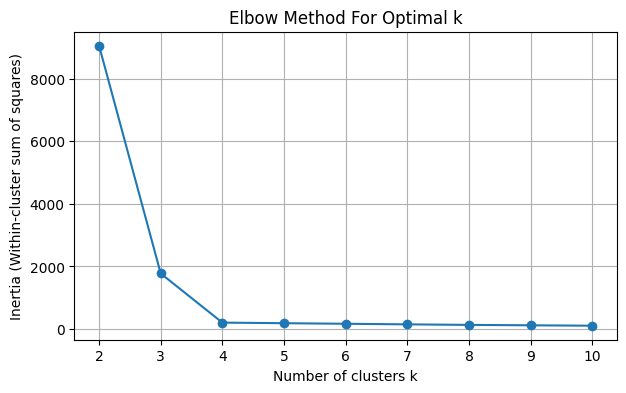

In [14]:
# Optional: Elbow method to choose number of clusters
inertias = []
K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df[['Feature_1', 'Feature_2']])
    inertias.append(km.inertia_)

import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(list(K_range), inertias, marker='o')
plt.xticks(list(K_range))
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

**Explanation:**

- The Elbow method runs K-Means for multiple `k` values and plots the inertia.
- Look for the 'elbow' point where inertia reduction slows — that suggests a reasonable `k`.
- The elbow is heuristic, not exact; domain knowledge is important.

## Real-World Interpretation

If clusters correspond to customer groups, each cluster can inform marketing strategies, product recommendations, or customer retention tactics.

---

## Student Practical Tasks

1. **Experiment with cluster count:** Change `n_clusters` in the KMeans call (3, 4, 5) and re-run the notebook. Observe changes.

2. **Iris dataset exercise:** Load Iris from `sklearn.datasets`, apply KMeans, and compare clusters with true species labels (use confusion matrix or scatter plot with colors by species).

3. **Custom data:** Generate `make_blobs(n_samples=400, centers=5, cluster_std=1.2)` and cluster.

4. **Anomaly detection (advanced):** Create a dataset where most points are clustered but include a few far-away points; compute distance to centroid and flag points with large distance as anomalies.

5. **Explain parameters:** Write a short paragraph explaining `centers` and `cluster_std` and how they affect the generated dataset (use visuals from this notebook).

## Key Takeaways

- Unsupervised learning uncovers hidden structure in unlabeled data.
- K-Means partitions data into `k` groups by minimizing within-cluster variance.
- `centers` determines how many group centers to generate when using `make_blobs`.
- `cluster_std` controls how spread out each generated cluster is.

